Tutorial following this Youtube series from Benjamin Kelm:
https://www.youtube.com/watch?v=1ReGB8ai_PQ&t=101s

Demonstrating a Python AVL Wrapper:
https://gitlab.com/relmendorp/avlwrapper/-/tree/master


In [1]:
%matplotlib inline

import json
from math import radians, sqrt, tan
import avlwrapper as avl

The airplane we are modeling (Sketch):


![Sketch](Graphic1.PNG)

<h1> Creating the geometry<h1>

Some important tips:
In AVL, the x-axis is defined rearwards towards tail of airplane. Y axis pointing along right wing. Z axis is pointing out of the screen

<h2>Wing<h2>

In [2]:
S_ref = 0.239 # m^2, Wing surface area
B_ref = 1.5 # m, Reference Span
C_ref = S_ref / B_ref # Wing Reference Chord, area divided by reference span
mach_number = 0.0 # Mach number to run analysis at
# Moment Reference Location
Xref = 0.0
YRef = 0.0
ZRef = 0.0
moment_ref_pt = avl.Point(Xref, YRef, ZRef)

# Now start building the Surface
Nchord = 12 # Number of chordwise horshoe vortices placed on the surface
Cspace = avl.Spacing.cosine # Chordwise vortex spacing Parameter

Nspan = 20 # Number of spanwise horshoe vortices placed on the surface
Sspace = avl.Spacing.cosine # Spanwise vortex spacing parameter

# Reflect the Wing
y_duplicate = 0.0 # Reflect about the y=0 plane

# Twist angle bias for whole surface
twist_angle = 2.0

# Translate Bias
translate_bias = avl.Point(0.3, 0, 0) # 300 mm from the tip of nose





Wing Root Section

In [3]:
# Start the sections, root chord section

# Define the leading edge position
wing_root_leading_edge = avl.Point(0.0, 0.0, 0.0)
wing_root_chord = 0.180
wing_root_angle = 0.0 # no twist

# Define what airfoil is used for this section
wing_root_airfoil = avl.NacaAirfoil('2412')

# Define a control surface
flap_cgain = 1.0 # No mixing of controls
flap_xhinge = 0.72 # Relative location of the hinge
flap_sgndup = 1.0 # Duplicate sign
flap_hingevec = avl.Point(0.0, 1.0, 0.0)# Axis which the surface rotates about

flap = avl.Control(
    name='flap',
    gain=flap_cgain,
    x_hinge=flap_xhinge,
    duplicate_sign=flap_sgndup,
    hinge_vector=flap_hingevec
)
# Now put together the section
wing_root_section = avl.Section(
    leading_edge_point= wing_root_leading_edge,
    chord=wing_root_chord,
    airfoil=wing_root_airfoil,
    controls=[flap]
)

Section 2

In [4]:
# Start the sections, Section 2
# Define the leading edge position
section2_leading_edge = avl.Point(0.0, 0.450, 0.0)
section2_chord = 0.180
section2_angle = 0.0 # no twist

# Define what airfoil is used for this section
section2_airfoil = avl.NacaAirfoil('2412')

# Define a control surface
flap2_cgain = 1.0 # No mixing of controls
flap2_xhinge = 0.72 # Relative location of the hinge
flap2_sgndup = 1.0 # Duplicate sign
flap2_hingevec = avl.Point(0.0, 1.0, 0.0) # Axis which the surface rotates about

# Another flap
flap2 = avl.Control(
    name='flap',
    gain=flap2_cgain,
    x_hinge=flap2_xhinge,
    duplicate_sign=flap2_sgndup,
    hinge_vector=flap2_hingevec
)

# Define a control surface (Aileron)
ail_cgain = 1.0 # No mixing of controls
ail_xhinge = 0.72 # Relative location of the hinge
ail_sgndup = -1.0 # Duplicate sign, ailerons deflect anti-symmetrically
ail_hingevec = avl.Point(0.0, 1.0, 0.0) # Axis which the surface rotates about

ail = avl.Control(
    name='aileron',
    gain=ail_cgain,
    x_hinge=ail_xhinge,
    duplicate_sign=ail_sgndup,
    hinge_vector=ail_hingevec
)
# Now put together the section
section2 = avl.Section(
    leading_edge_point= section2_leading_edge,
    chord=section2_chord,
    airfoil=section2_airfoil,
    controls=[flap2, ail]
)

Section 3

In [5]:
# Start the sections, Section 3
# Define the leading edge position
section3_leading_edge = avl.Point(0.060, 0.650, 0.0)
section3_chord = 0.120
section3_angle = 0.0 # no twist

# Define what airfoil is used for this section
section3_airfoil = avl.NacaAirfoil('2412')

# Define a control surface (Aileron)
ail2_cgain = 1.0 # No mixing of controls
ail2_xhinge = 0.72 # Relative location of the hinge
ail2_sgndup = -1.0 # Duplicate sign, ailerons deflect anti-symmetrically
ail2_hingevec = avl.Point(0.0, 1.0, 0.0) # Axis which the surface rotates about

ail2 = avl.Control(
    name='aileron',
    gain=ail2_cgain,
    x_hinge=ail2_xhinge,
    duplicate_sign=ail2_sgndup,
    hinge_vector=ail2_hingevec
)

# Now put together the section
section3 = avl.Section(
    leading_edge_point= section3_leading_edge,
    chord=section3_chord,
    airfoil=section3_airfoil,
    controls=[ail2]
)

End Section

In [6]:
# Section 4: End Section
# Define the leading edge position
section4_leading_edge = avl.Point(0.130, 0.750, 0.0)
section4_chord = 0.050
section4_angle = 0.0 # no twist

# Define what airfoil is used for this section
section4_airfoil = avl.NacaAirfoil('2412')

# Now put together the section
section4 = avl.Section(
    leading_edge_point= section4_leading_edge,
    chord=section4_chord,
    airfoil=section4_airfoil
)

In [7]:
wing = avl.Surface(
    name='wing',
    n_chordwise=Nchord,
    chord_spacing=Cspace,
    n_spanwise=Nspan,
    span_spacing=Sspace,
    y_duplicate=y_duplicate,
    sections=[wing_root_section, section2, section3, section4],
    translation=translate_bias, 
    angle=twist_angle,
)

Horizontal Stabilizer Surface

In [8]:
ht_Nchord = 8.0
ht_Cspace = avl.Spacing.cosine
ht_Nspan = 5.0
ht_Sspace = avl.Spacing.cosine
ht_y_duplicate = 0.0
ht_angle = -2.0 # Degrees
# Translate local coordinate system to leading edge of ht
ht_translate_bias = avl.Point(1.0, 0, 0.175) 


# Begin the first section (Inner)
ht_section1_leading_edge = avl.Point(0.0, 0.0, 0.0)
ht_section1_chord = 0.1
ht_section1_angle = 0.0

ht_section1_airfoil = avl.NacaAirfoil('0010')

# Define elevator
ele_cgain = 1.0 # No mixing of controls
ele_xhinge = 0.7 # Relative location of the hinge
ele_sgndup = 1.0 # Duplicate sign, ailerons deflect anti-symmetrically
ele_hingevec = avl.Point(0.0, 1.0, 0.0) # Axis which the surface rotates about
ele = avl.Control(
    name='elevator',
    gain=ele_cgain,
    x_hinge=ele_xhinge,
    duplicate_sign=ele_sgndup,
    hinge_vector=ele_hingevec
)

# Now put together the section
ht_section1 = avl.Section(
    leading_edge_point= ht_section1_leading_edge,
    chord=ht_section1_chord,
    airfoil=ht_section1_airfoil,
    controls=[ele]
)

# Section 2 (Middle)
ht_section2_leading_edge = avl.Point(0.0, 0.220, 0.0)
ht_section2_chord = 0.100
ht_section2_angle = 0.0

ht_section2_airfoil = avl.NacaAirfoil('0010')
# Now put together the section
ht_section2 = avl.Section(
    leading_edge_point= ht_section2_leading_edge,
    chord=ht_section2_chord,
    airfoil=ht_section2_airfoil,
    controls=[ele]
)

# Section 3 (End Section)
ht_section3_leading_edge = avl.Point(0.0, 0.3, 0.0)
ht_section3_chord = 0.030
ht_section3_angle = 0.0

ht_section3_airfoil = avl.NacaAirfoil('0010')
# Now put together the section
ht_section3 = avl.Section(
    leading_edge_point= ht_section3_leading_edge,
    chord=ht_section3_chord,
    airfoil=ht_section3_airfoil,
    controls=[ele]
)

# Assemble HT
ht = avl.Surface(
    name='horizontal_tail',
    n_chordwise=ht_Nchord,
    chord_spacing=ht_Cspace,
    n_spanwise=ht_Nspan,
    span_spacing=ht_Sspace,
    y_duplicate=ht_y_duplicate,
    sections=[ht_section1, ht_section2, ht_section3],
    translation=ht_translate_bias, 
    angle=ht_angle,
)


Rudder

In [9]:
# Modeling the Rudder/V-Stab now
vt_Nchord = 8.0
vt_Cspace = avl.Spacing.cosine
vt_Nspan = 10.0
vt_Sspace = avl.Spacing.cosine
# Translate local coordinate system to leading edge of vt
vt_translate_bias = avl.Point(0.950, 0, 0.0) 

vt_y_duplicate=0.0

# Begin the first section of vt (lower)
vt_section1_leading_edge = avl.Point(0.0, 0.0, 0.0)
vt_section1_chord = 0.150
vt_section1_angle = 0.0

vt_section1_airfoil = avl.NacaAirfoil('0010')

# Define Rudder
rud_cgain = 1.0 # No mixing of controls
rud_xhinge = 0.67 # Relative location of the hinge
rud_sgndup = 1.0 # Duplicate sign, ailerons deflect anti-symmetrically
rud_hingevec = avl.Point(0.0, 0.0, 1.0) # Axis which the surface rotates about
rud = avl.Control(
    name='rudder',
    gain=rud_cgain,
    x_hinge=rud_xhinge,
    duplicate_sign=rud_sgndup,
    hinge_vector=rud_hingevec
)

# Now put together the section
vt_section1 = avl.Section(
    leading_edge_point= vt_section1_leading_edge,
    chord=vt_section1_chord,
    airfoil=vt_section1_airfoil,
    controls=[rud]
)

# Section 2 of V-Stab (Upper)
vt_section2_leading_edge = avl.Point(0.070, 0.0, 0.300)
vt_section2_chord = 0.080
vt_section2_angle = 0.0

vt_section2_airfoil = avl.NacaAirfoil('0010')

vt_section2 = avl.Section(
    leading_edge_point=vt_section2_leading_edge,
    chord=vt_section2_chord,
    airfoil=vt_section2_airfoil,
    controls=[rud]
)

# Assemble VT
vt = avl.Surface(
    name='vertial_tail',
    n_chordwise=vt_Nchord,
    chord_spacing=vt_Cspace,
    n_spanwise=vt_Nspan,
    span_spacing=vt_Sspace,
    y_duplicate=vt_y_duplicate,
    sections=[vt_section1, vt_section2],
    translation=vt_translate_bias, 
)



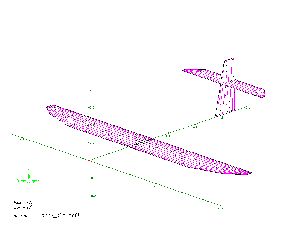

In [11]:
# make geometry

aircraft = avl.Geometry(
    name='bens_aircraft',
    reference_area=S_ref,
    reference_chord=C_ref,
    reference_span=B_ref,
    reference_point=moment_ref_pt,
    mach=mach_number,
    surfaces=[wing, ht, vt]
)

# Plot Geometry
# create a session with only the geometry
session = avl.Session(geometry=aircraft)

# check if we have ghostscript
if 'gs_bin' in session.config.settings:
    img = session.save_geometry_plot()[0]
    avl.show_image(img)
else:
    session.show_geometry()

session.show_geometry()



<h1> Case Analysis <h1>